In [ ]:
#DONE BY
#CS20B1057
#A S V DHANUSH
#Breast Cancer Wisconsin (Diagnostic) Data Set
#Predict whether the cancer is benign or malignant (WHETHER PATIENT HAS CANCER OR NOT)
#Benign tissue is called healthy and malignant tissue is considered cancerous.
#M = Malignant , B=Benign

'''During a fine needle aspiration (FNA), a small amount of breast tissue or fluid is removed from a suspicious area with a thin,
hollow needle and checked for cancer cells.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
They describe characteristics of the cell nuclei present in the image.'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as accs
from sklearn.metrics import confusion_matrix as cm
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

df = pd.read_csv("cancer_data.csv")
#print(df) 
print(f"THE MATRIX SIZE : {df.shape}")
print("-------------------------------------------------------------------------------------------------------")
#checking for datatypes
print(df.dtypes)
print("-------------------------------------------------------------------------------------------------------")

In [ ]:
#copying the data frames data into another dataframe
df_copy = df.copy(deep = True)
#getting the detais of df_copy dataframe
print("------------------------------------------DESCRIBE-----------------------------------------------------")
print(df_copy.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")

In [ ]:
#removing the duplicate values in this dataframe
retStatus = df_copy.drop_duplicates(inplace=True)
print("IF DUPLICATES ARE NOT PRESENT THEN OUT WILL BE 'None'")
print(f"Are Duplicates Present? :{retStatus}")

#since there are no duplicates in this dataframe we will go ahead and remove NaN values in this dataframe
#df_without_nan = df_copy.dropna()
#print(df_without_nan)
#since there are no NaN entries in our dataframe we can move forward to plotting the graphs adn synthesizing the data and remvoing the outliers

In [ ]:
#dividing the dataset based on the diagnosis (based of M OR B)
#MALIGNANT DATAFRAME DETAILS

print("--------------------------------------------MALIGNANT--------------------------------------------------")
df_malignant = df_copy[df["diagnosis"] == 'M']
print(f"The size of Malignant dataset : {df_malignant.shape}")
#print(df_malignant)
print(df_malignant.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")


In [ ]:
#BENIGN DATAFRAME DETAILS
print("--------------------------------------------BENIGN-----------------------------------------------------")
df_benign = df_copy[df["diagnosis"] == 'B']
print(f"The size is of Benign dataset : {df_benign.shape}")
#print(df_benign)
df_copy['diagnosis'] = df_copy.diagnosis.astype('category')
print(df_benign.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")

In [ ]:
print("---------------------------- DATA FRAME GROUPED BY DIAGNOSIS COUNT ------------------------------------")
print(df_copy.groupby(["diagnosis"]).count())
print("-------------------------------------------------------------------------------------------------------")
#finding the ratio of  benign and benign
ratio = df_benign["diagnosis"].count()/df_malignant["diagnosis"].count()

print(f"RATIO OF BENIGN / MALIGNANT : {math.ceil(ratio)}")
#SINCE THE RATIO IS CLOSE TO 2:1 WE CAN PREDICT FOR NOW THAT MOJORILY BENIGN DIAGNOSIS IS MORE (HEALTHY PATIENTS ARE MORE)!

In [ ]:

#Since we dont need the patient id for the prediction of brest cancer
#we drop the id column

df_copy = df_copy.drop(labels = "id" ,axis=1)
#print(df_copy)
#id column has been dropped
df_without_diagnosis = df_copy.drop(["diagnosis"],axis=1)
#dataframe without diagnosis column
print(df_without_diagnosis)
print("-------------------------------------------------------------------------------------------------------")

In [32]:
#WE NORMALISE THE DATA BEFORE FINDING DOING THE CLASSIFICATION
cols = list(df_without_diagnosis.columns)
for i in cols:
    col_zscore = i + '_scaled'
    df_without_diagnosis[col_zscore] = (df_without_diagnosis[i]-df_without_diagnosis[i].mean())/df_without_diagnosis[i].std(ddof=0)
#print(f"---------------------------------------NORMALIZED VALUES OF THE DATA SET------------------------------\n{df_without_diagnosis}")

#print("-------------------------------------------------------------------------------------------------------")
#print("____________________________________K-NEAREST NEIGHBOURS CLASSIFIER____________________________________")
X_train, X_test, X_label_train, X_label_test = train_test_split(df_without_diagnosis,df_copy["diagnosis"],test_size=0.3, random_state=42)
#dropping the 'Class' column is the training and testing array

acc_list=[]
acc_index=[]
#for i in range(1,100,2):
    #K-Nearest Neigbours for K = 11
n1 = knn(n_neighbors=11)
n1.fit(X_train, X_label_train)

pred1 = n1.predict(X_test)
print("The Predicted Values Are")
print(pred1)

print("Confusion Matrix")
confusion1 =  cm(X_label_test, pred1)
print(confusion1)
#print("Accuracy Score")
accur1 = accs(X_label_test,pred1)
acc_list.append(accur1)
acc_index.append(i)
#print(accur1)
print(f"----------------------------------------THE KNN FOR K VALUES TILL 100--------------------------------- \n{acc_list}")
print("-------------------------------------------------------------------------------------------------------")
        

The Predicted Values Are
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B']
Confusion Matrix
[[107   1]
 [  3  60]]
----------------------------------------THE KNN FOR K VALUES TILL 100--------------------------------- 
[0.9766081871345029]
-------------------------------------------------------------------------------------------------------


In [ ]:
#PLOTTING GRAPH BETWEEN NUMBER OF MALIGNANT AND BENIGN CASES
df_plot = pd.DataFrame({'Cancer_Cell':['M', 'B'], 'Diagnosis_Count':[df_malignant["diagnosis"].count(),df_benign["diagnosis"].count()]})
ax = df_plot.plot.bar( x='Cancer_Cell',y='Diagnosis_Count',color=['green','brown'])

In [ ]:
#PLOTTING THE MEANS FOF EACH FEATURE FOR MALIGNANT AND BENIGN
list_col = []
list_col_means_m = []
list_col_means_b = []
for i in df_copy.columns:
    if(i != "diagnosis" and i!= "id"):
        list_col.append(i)
        list_col_means_m.append(df_malignant[i].mean())
        list_col_means_b.append(df_benign[i].mean())
        df_plot1 = pd.DataFrame({'cols':i ,'values':{'M':df_malignant[i].mean(),'B':df_benign[i].mean()}})
        ax1 = df_plot1.plot.bar( x='cols',y='values',color=['orange','blue'])

In [ ]:
#KNN PLOT FOR K VALUES TILL 100
#TREND FOR KNN AS WE INCREASE THE VALUE OF K
#KDE PLOT
sns.kdeplot(acc_list)


<AxesSubplot: >

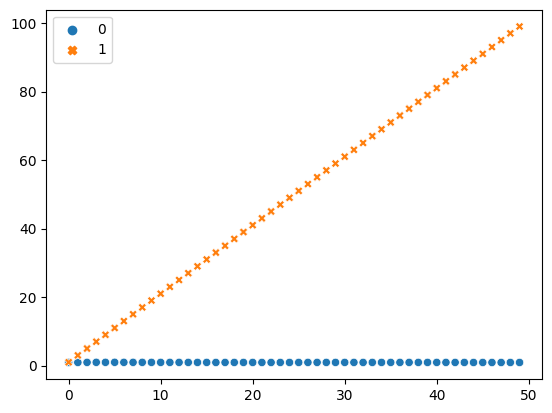

In [31]:
#SCATTERPLOT
sns.scatterplot([acc_list,acc_index])